In [367]:
import pandas as pd
import numpy as np

In [368]:
df = pd.read_csv('Country-data.csv')
country_names = np.asarray(df['country'])
df.drop('country', axis=1, inplace=True)


df_columns = df.columns
df.shape

(167, 9)

In [369]:
from sklearn.preprocessing import StandardScaler
learn_scaler=StandardScaler().fit(df)
standard_df = learn_scaler.transform(df)
standard_df = pd.DataFrame(standard_df, columns = df_columns)

In [370]:
ones_frame = np.ones(standard_df.corr().shape)
lower_triangle = np.tril(ones_frame, k=-1)
lower = standard_df.corr().where(lower_triangle.astype('bool'))
to_drop = []
for column in lower.columns: 
    if any(lower[column]  > 0.8 ):
        to_drop.append(column)

# ones_frame = np.ones(standard_df.corr().shape)
# lower_triangle = np.tril(ones_frame, k=-1)
# lower = standard_df.corr().where(lower_triangle.astype('bool'))

for column in lower.columns: 
    if any(lower[column]  < -0.8 ):
        to_drop.append(column)
to_drop

['child_mort', 'income', 'child_mort']

In [371]:
to_drop = np.unique(to_drop)
to_drop

array(['child_mort', 'income'], dtype='<U10')

In [372]:
standard_df.drop(to_drop, axis=1, inplace = True)
standard_df

,exports,health,imports,inflation,life_expec,total_fer,gdpp
0,-1.138280,0.279088,-0.082455,0.157336,-1.619092,1.902882,-0.679180
1,-0.479658,-0.097016,0.070837,-0.312347,0.647866,-0.859973,-0.485623
2,-0.099122,-0.966073,-0.641762,0.789274,0.670423,-0.038404,-0.465376
3,0.775381,-1.448071,-0.165315,1.387054,-1.179234,2.128151,-0.516268
4,0.160668,-0.286894,0.497568,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...
162,0.200917,-0.571711,0.240700,-0.489784,-0.852161,0.365754,-0.546913
163,-0.461363,-0.695862,-1.213499,3.616865,0.546361,-0.316678,0.029323
164,1.130305,0.008877,1.380030,0.409732,0.286958,-0.661206,-0.637754
165,-0.406478,-0.597272,-0.517472,1.500916,-0.344633,1.140944,-0.637754


In [373]:
features_to_plot = ['gdpp', 'life_expec','inflation']

In [374]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=4,
         affinity='nearest_neighbors',
         random_state=0)

clustering = model.fit(standard_df)
labels = clustering.labels_

In [375]:
import sklearn.metrics
sklearn.metrics.silhouette_score(standard_df, labels)

0.21331750922716836

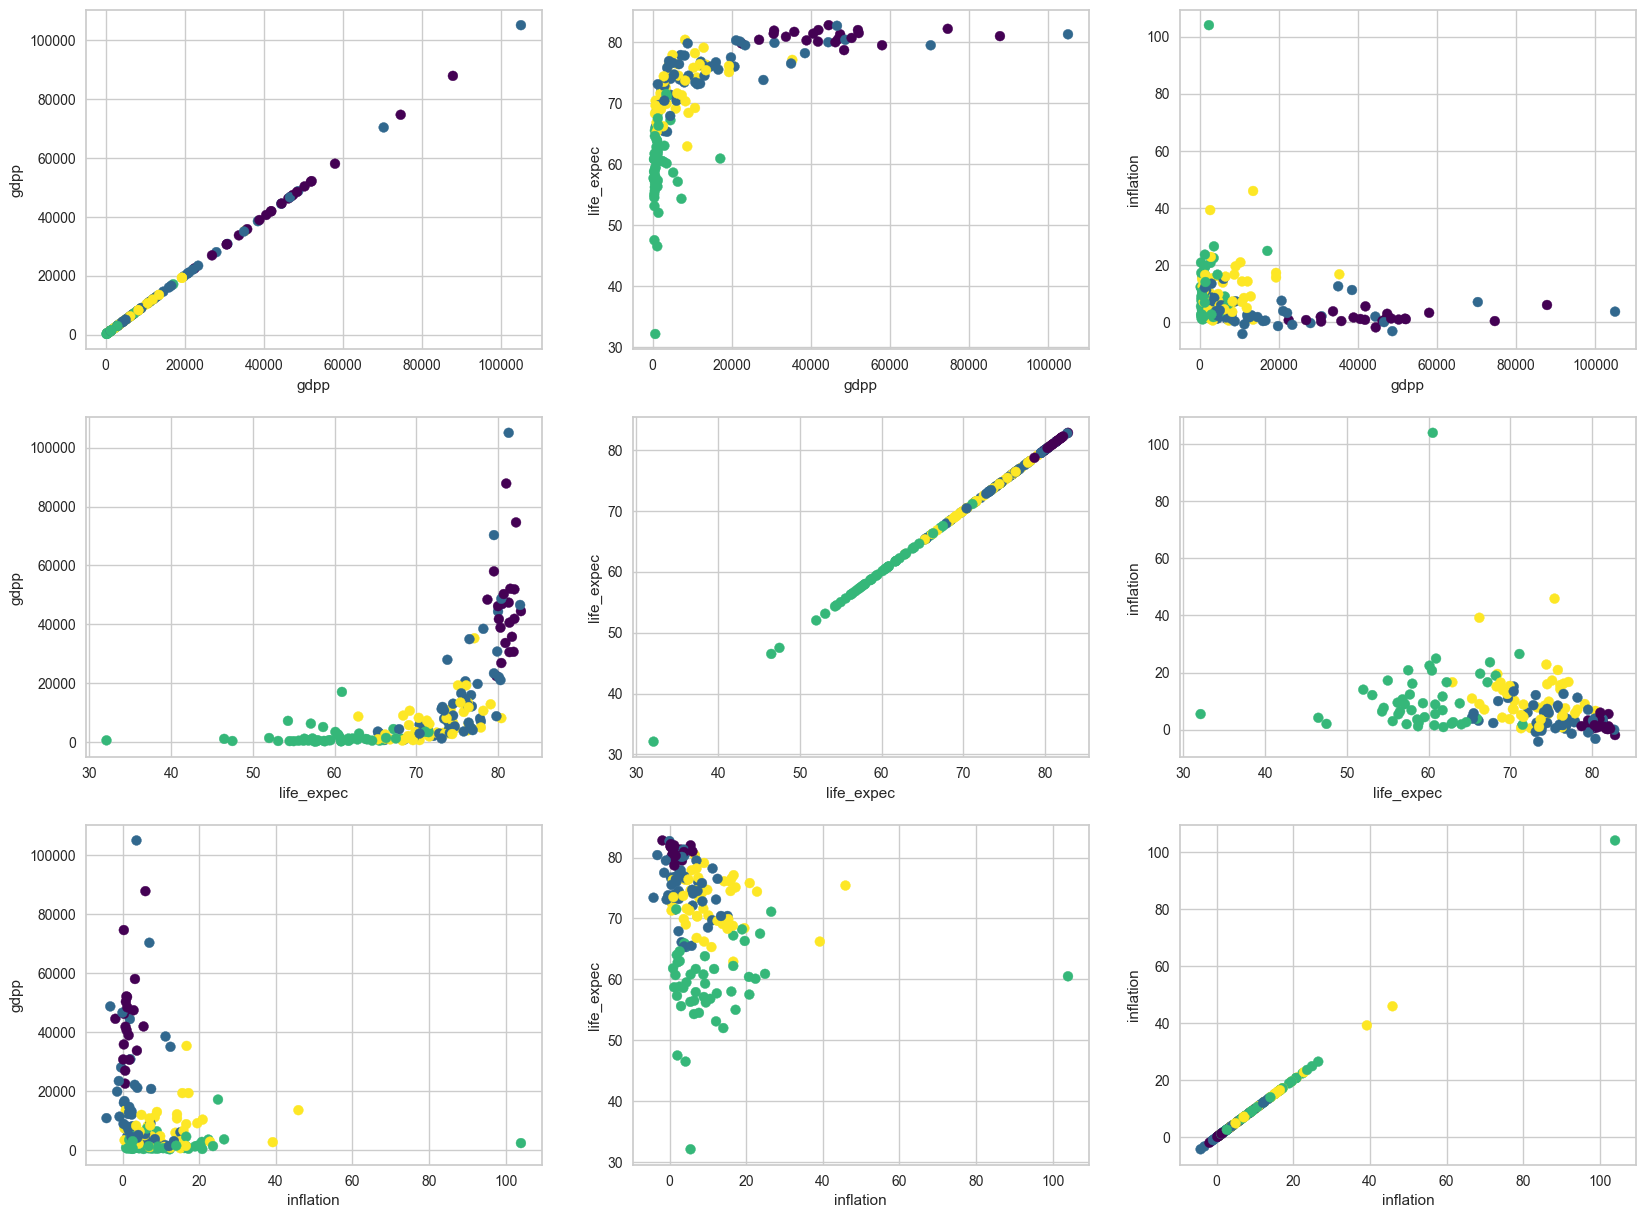

In [376]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 3, figsize=(20,15))
for i in range(len(features_to_plot)):
    for j in range(len(features_to_plot)):
        ax[i, j].scatter(df[features_to_plot[i]], df[features_to_plot[j]], c=labels, cmap='viridis', s=50)
        ax[i, j].set_xlabel(features_to_plot[i])
        ax[i, j].set_ylabel(features_to_plot[j])

plt.show()

In [377]:
print(dict(zip(country_names, labels)))

{'Afghanistan': 2, 'Albania': 3, 'Algeria': 3, 'Angola': 2, 'Antigua and Barbuda': 1, 'Argentina': 3, 'Armenia': 3, 'Australia': 0, 'Austria': 0, 'Azerbaijan': 3, 'Bahamas': 1, 'Bahrain': 1, 'Bangladesh': 3, 'Barbados': 1, 'Belarus': 1, 'Belgium': 1, 'Belize': 1, 'Benin': 2, 'Bhutan': 1, 'Bolivia': 3, 'Bosnia and Herzegovina': 1, 'Botswana': 2, 'Brazil': 3, 'Brunei': 3, 'Bulgaria': 1, 'Burkina Faso': 2, 'Burundi': 2, 'Cambodia': 1, 'Cameroon': 2, 'Canada': 0, 'Cape Verde': 3, 'Central African Republic': 2, 'Chad': 2, 'Chile': 3, 'China': 3, 'Colombia': 3, 'Comoros': 2, 'Congo, Dem. Rep.': 2, 'Congo, Rep.': 2, 'Costa Rica': 3, "Cote d'Ivoire": 2, 'Croatia': 3, 'Cyprus': 1, 'Czech Republic': 1, 'Denmark': 0, 'Dominican Republic': 3, 'Ecuador': 3, 'Egypt': 3, 'El Salvador': 3, 'Equatorial Guinea': 2, 'Eritrea': 2, 'Estonia': 1, 'Fiji': 1, 'Finland': 0, 'France': 0, 'Gabon': 3, 'Gambia': 2, 'Georgia': 1, 'Germany': 0, 'Ghana': 2, 'Greece': 0, 'Grenada': 3, 'Guatemala': 3, 'Guinea': 2, 'Gui

In [378]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=3,
         affinity='nearest_neighbors',
         random_state=0)

clustering = model.fit(standard_df)
labels = clustering.labels_

In [379]:
sklearn.metrics.silhouette_score(standard_df, labels)

0.2484796646050493

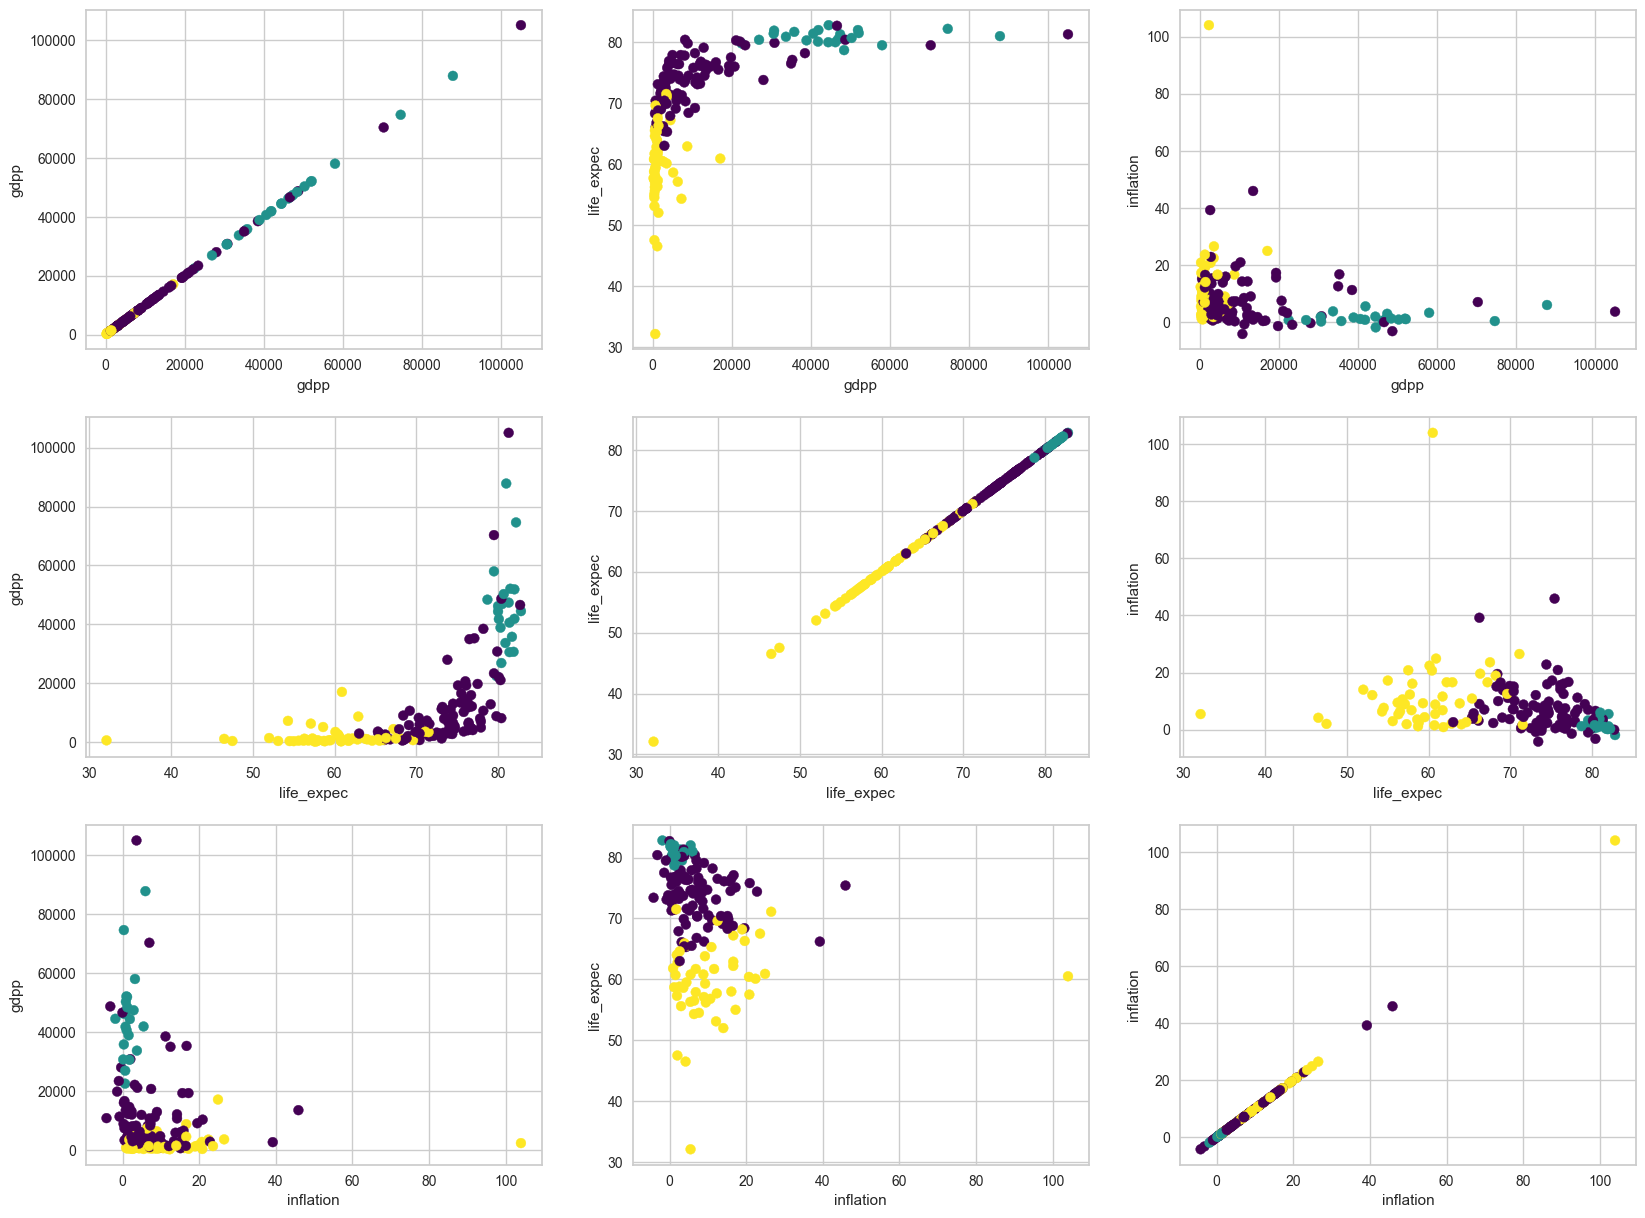

In [380]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 3, figsize=(20,15))
for i in range(len(features_to_plot)):
    for j in range(len(features_to_plot)):
        ax[i, j].scatter(df[features_to_plot[i]], df[features_to_plot[j]], c=labels, cmap='viridis', s=50)
        ax[i, j].set_xlabel(features_to_plot[i])
        ax[i, j].set_ylabel(features_to_plot[j])

plt.show()

In [381]:
print(dict(zip(country_names, labels)))

{'Afghanistan': 2, 'Albania': 0, 'Algeria': 0, 'Angola': 2, 'Antigua and Barbuda': 0, 'Argentina': 0, 'Armenia': 0, 'Australia': 1, 'Austria': 1, 'Azerbaijan': 0, 'Bahamas': 0, 'Bahrain': 0, 'Bangladesh': 0, 'Barbados': 0, 'Belarus': 0, 'Belgium': 1, 'Belize': 0, 'Benin': 2, 'Bhutan': 0, 'Bolivia': 0, 'Bosnia and Herzegovina': 0, 'Botswana': 2, 'Brazil': 0, 'Brunei': 0, 'Bulgaria': 0, 'Burkina Faso': 2, 'Burundi': 2, 'Cambodia': 0, 'Cameroon': 2, 'Canada': 1, 'Cape Verde': 0, 'Central African Republic': 2, 'Chad': 2, 'Chile': 0, 'China': 0, 'Colombia': 0, 'Comoros': 2, 'Congo, Dem. Rep.': 2, 'Congo, Rep.': 2, 'Costa Rica': 0, "Cote d'Ivoire": 2, 'Croatia': 0, 'Cyprus': 0, 'Czech Republic': 0, 'Denmark': 1, 'Dominican Republic': 0, 'Ecuador': 0, 'Egypt': 0, 'El Salvador': 0, 'Equatorial Guinea': 2, 'Eritrea': 2, 'Estonia': 0, 'Fiji': 0, 'Finland': 1, 'France': 1, 'Gabon': 2, 'Gambia': 2, 'Georgia': 0, 'Germany': 1, 'Ghana': 2, 'Greece': 1, 'Grenada': 0, 'Guatemala': 0, 'Guinea': 2, 'Gui

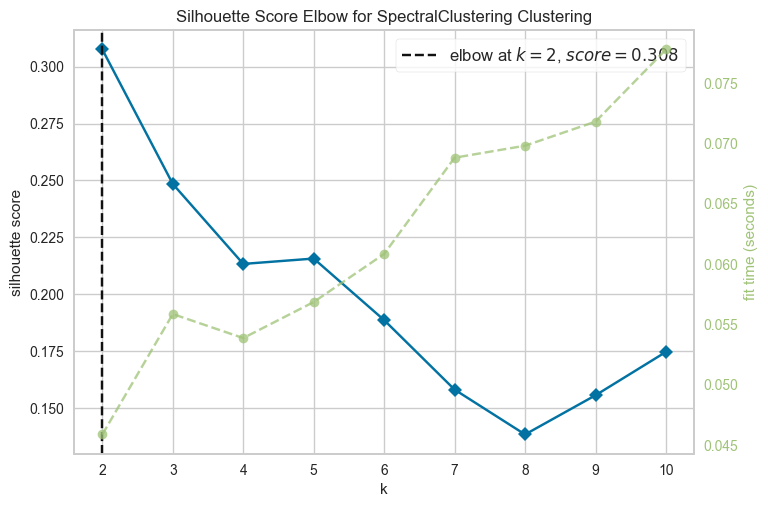

<AxesSubplot: title={'center': 'Silhouette Score Elbow for SpectralClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [382]:
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
model = SpectralClustering(affinity='nearest_neighbors', random_state=0)
visualizer = KElbowVisualizer(
    model, k=(2,11), metric='silhouette'
)

visualizer.fit(standard_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [383]:
model = SpectralClustering(n_clusters=2,
         affinity='nearest_neighbors',
         random_state=0)

clustering = model.fit(standard_df)
labels = clustering.labels_


In [384]:
sklearn.metrics.silhouette_score(standard_df, labels)

0.307608760029471

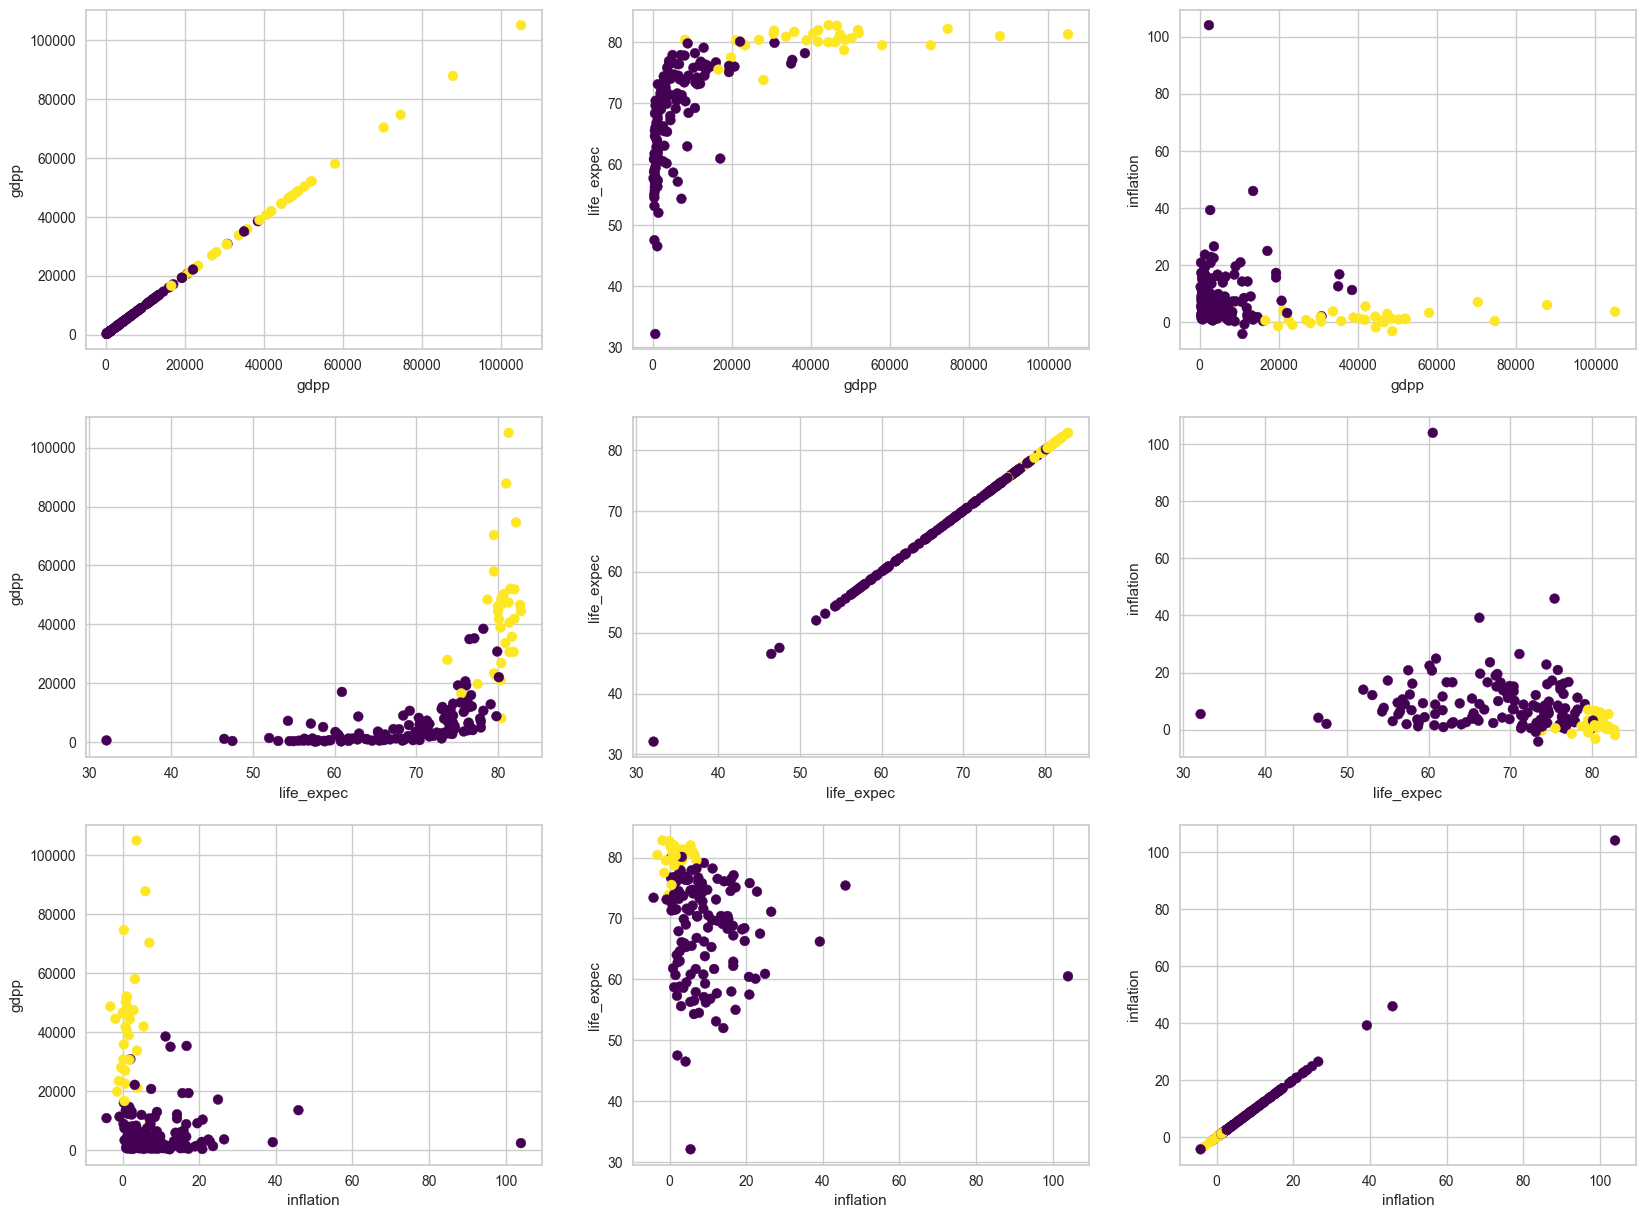

In [385]:
fig, ax = plt.subplots(3, 3, figsize=(20,15))
for i in range(len(features_to_plot)):
    for j in range(len(features_to_plot)):
        ax[i, j].scatter(df[features_to_plot[i]], df[features_to_plot[j]], c=labels, cmap='viridis', s=50)
        ax[i, j].set_xlabel(features_to_plot[i])
        ax[i, j].set_ylabel(features_to_plot[j])

plt.show()

In [386]:
print(dict(zip(country_names, labels)))

{'Afghanistan': 0, 'Albania': 0, 'Algeria': 0, 'Angola': 0, 'Antigua and Barbuda': 0, 'Argentina': 0, 'Armenia': 0, 'Australia': 1, 'Austria': 1, 'Azerbaijan': 0, 'Bahamas': 1, 'Bahrain': 0, 'Bangladesh': 0, 'Barbados': 0, 'Belarus': 0, 'Belgium': 1, 'Belize': 0, 'Benin': 0, 'Bhutan': 0, 'Bolivia': 0, 'Bosnia and Herzegovina': 0, 'Botswana': 0, 'Brazil': 0, 'Brunei': 0, 'Bulgaria': 0, 'Burkina Faso': 0, 'Burundi': 0, 'Cambodia': 0, 'Cameroon': 0, 'Canada': 1, 'Cape Verde': 0, 'Central African Republic': 0, 'Chad': 0, 'Chile': 0, 'China': 0, 'Colombia': 0, 'Comoros': 0, 'Congo, Dem. Rep.': 0, 'Congo, Rep.': 0, 'Costa Rica': 1, "Cote d'Ivoire": 0, 'Croatia': 0, 'Cyprus': 0, 'Czech Republic': 1, 'Denmark': 1, 'Dominican Republic': 0, 'Ecuador': 0, 'Egypt': 0, 'El Salvador': 0, 'Equatorial Guinea': 0, 'Eritrea': 0, 'Estonia': 0, 'Fiji': 0, 'Finland': 1, 'France': 1, 'Gabon': 0, 'Gambia': 0, 'Georgia': 0, 'Germany': 1, 'Ghana': 0, 'Greece': 1, 'Grenada': 0, 'Guatemala': 0, 'Guinea': 0, 'Gui

In [387]:
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X=standard_df, n_neighbors=10)

adjacency_matrix_s = (1/2)*(connectivity + connectivity.T)

from scipy.sparse import csgraph
graph_laplacian  = csgraph.laplacian(adjacency_matrix_s, normed=False)
graph_laplacian = graph_laplacian.toarray()


# find the eigenvalues and eigenvectors
vals, vecs = np.linalg.eig(graph_laplacian)

# sort
vecs = vecs[:,np.argsort(vals)]
vals = vals[np.argsort(vals)]


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(vecs[:,:3])
labels = kmeans.labels_


In [388]:
sklearn.metrics.silhouette_score(standard_df, labels)

0.24670895083725033

In [389]:
print(dict(zip(country_names, labels)))

{'Afghanistan': 2, 'Albania': 0, 'Algeria': 0, 'Angola': 2, 'Antigua and Barbuda': 0, 'Argentina': 0, 'Armenia': 0, 'Australia': 1, 'Austria': 1, 'Azerbaijan': 0, 'Bahamas': 0, 'Bahrain': 0, 'Bangladesh': 0, 'Barbados': 0, 'Belarus': 0, 'Belgium': 1, 'Belize': 0, 'Benin': 2, 'Bhutan': 0, 'Bolivia': 0, 'Bosnia and Herzegovina': 0, 'Botswana': 2, 'Brazil': 0, 'Brunei': 0, 'Bulgaria': 0, 'Burkina Faso': 2, 'Burundi': 2, 'Cambodia': 0, 'Cameroon': 2, 'Canada': 1, 'Cape Verde': 0, 'Central African Republic': 2, 'Chad': 2, 'Chile': 0, 'China': 0, 'Colombia': 0, 'Comoros': 2, 'Congo, Dem. Rep.': 2, 'Congo, Rep.': 2, 'Costa Rica': 0, "Cote d'Ivoire": 2, 'Croatia': 0, 'Cyprus': 0, 'Czech Republic': 0, 'Denmark': 1, 'Dominican Republic': 0, 'Ecuador': 0, 'Egypt': 0, 'El Salvador': 0, 'Equatorial Guinea': 2, 'Eritrea': 2, 'Estonia': 0, 'Fiji': 0, 'Finland': 1, 'France': 1, 'Gabon': 2, 'Gambia': 2, 'Georgia': 0, 'Germany': 1, 'Ghana': 2, 'Greece': 1, 'Grenada': 0, 'Guatemala': 0, 'Guinea': 2, 'Gui

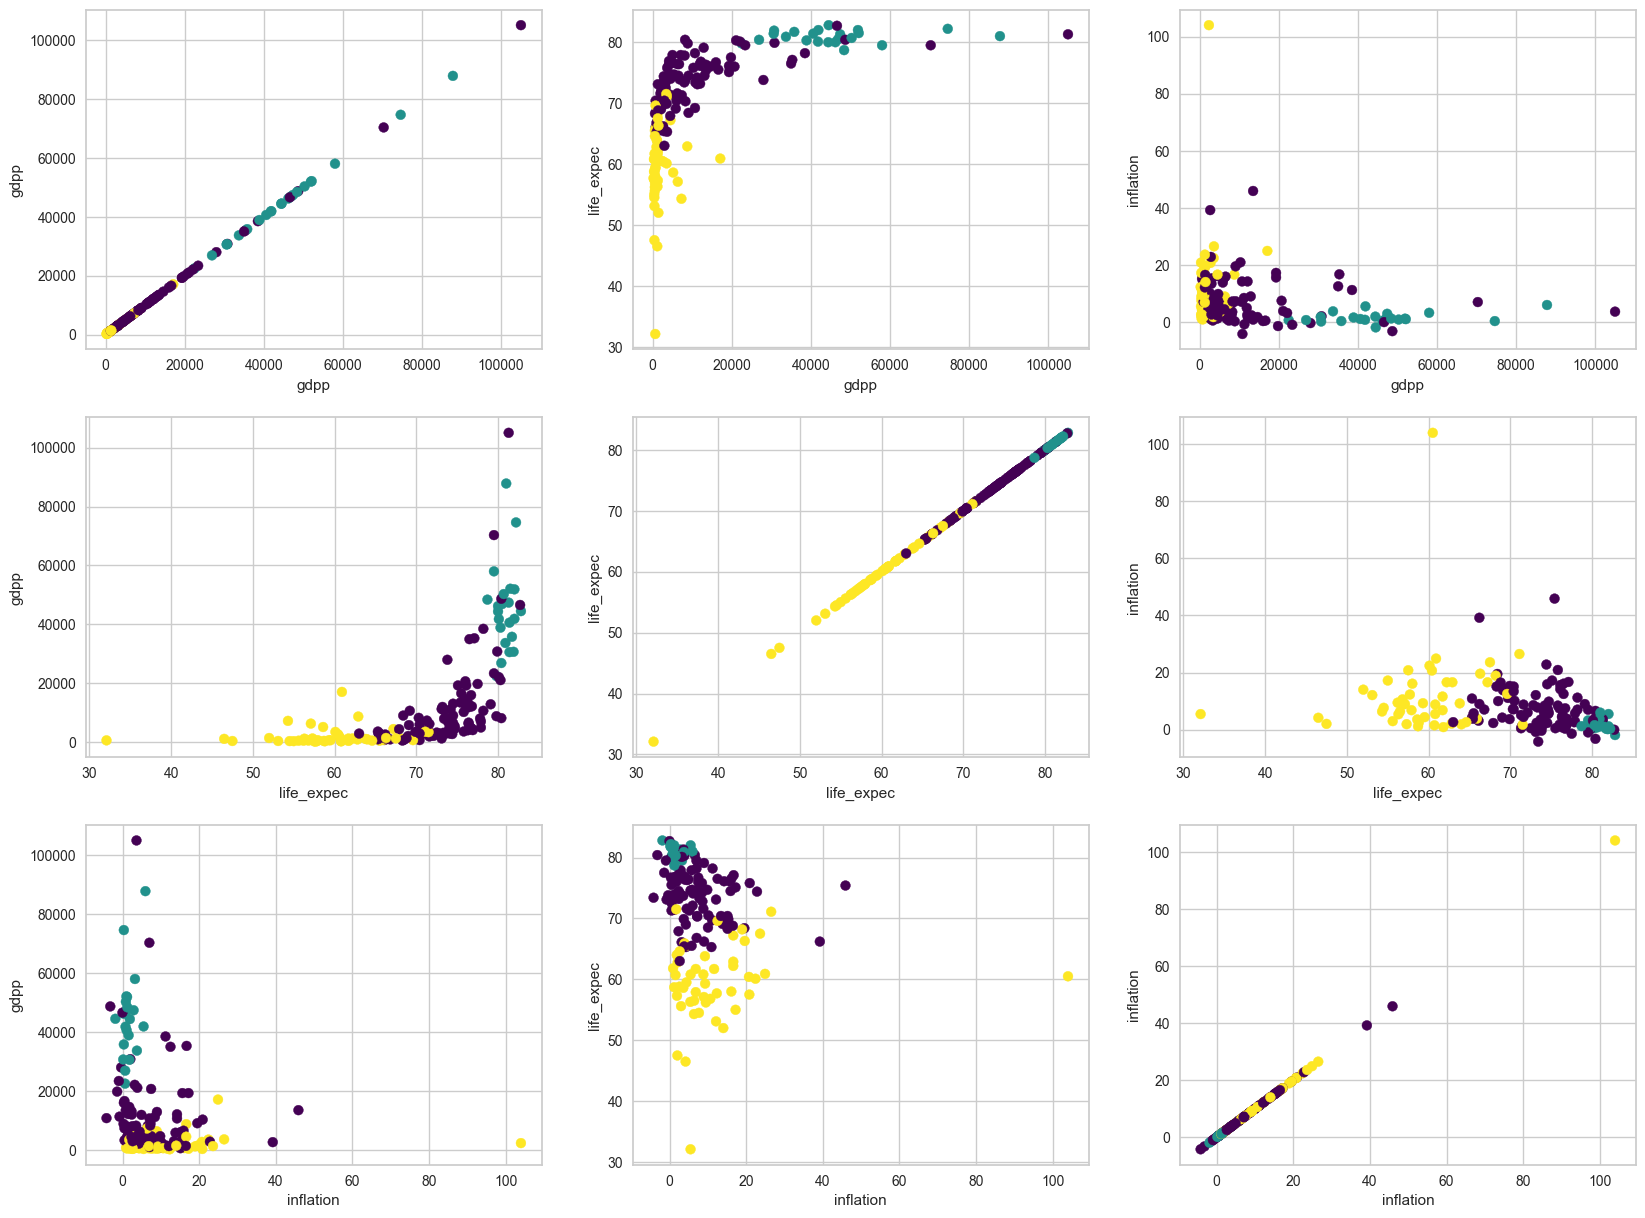

In [390]:
fig, ax = plt.subplots(3, 3, figsize=(20,15))
for i in range(len(features_to_plot)):
    for j in range(len(features_to_plot)):
        ax[i, j].scatter(df[features_to_plot[i]], df[features_to_plot[j]], c=labels, cmap='viridis', s=50)
        ax[i, j].set_xlabel(features_to_plot[i])
        ax[i, j].set_ylabel(features_to_plot[j])

plt.show()

In [391]:
import sklearn.metrics
silhouette_scores = [] 
for i in range(2, 11): 
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(vecs[:,:i])
    #labels = kmeans.labels_
    silhouette_scores.append(sklearn.metrics.silhouette_score(standard_df, kmeans.labels_))

In [392]:
silhouette_scores

[0.31622199086523844,
 0.24670895083725033,
 0.21115780314322316,
 0.21816894909120735,
 0.19714429684834542,
 0.17801824554893658,
 0.20428845886643765,
 0.19790873633742334,
 0.17597194770238045]

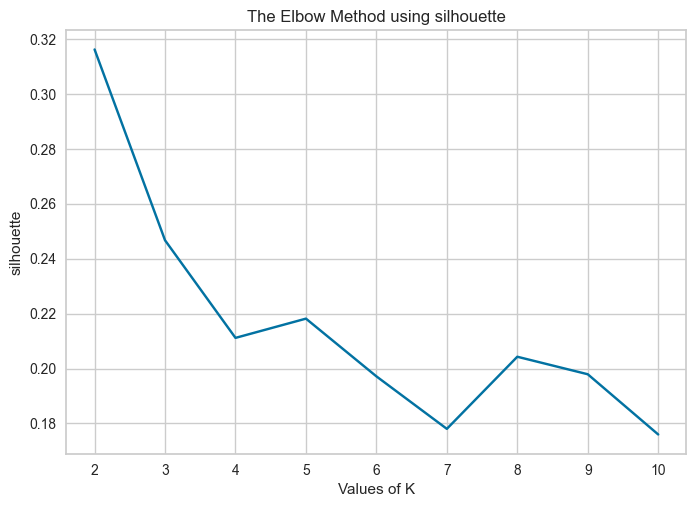

In [393]:
import matplotlib.pyplot as plt
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('silhouette')
plt.title('The Elbow Method using silhouette')
plt.show()

In [394]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)
kmeans.fit(vecs[:,:2]) 
labels = kmeans.labels_


In [395]:
sklearn.metrics.silhouette_score(standard_df, labels)

0.31622199086523844

In [396]:
print(dict(zip(country_names, labels)))

{'Afghanistan': 0, 'Albania': 0, 'Algeria': 0, 'Angola': 0, 'Antigua and Barbuda': 0, 'Argentina': 0, 'Armenia': 0, 'Australia': 1, 'Austria': 1, 'Azerbaijan': 0, 'Bahamas': 1, 'Bahrain': 0, 'Bangladesh': 0, 'Barbados': 0, 'Belarus': 0, 'Belgium': 1, 'Belize': 0, 'Benin': 0, 'Bhutan': 0, 'Bolivia': 0, 'Bosnia and Herzegovina': 0, 'Botswana': 0, 'Brazil': 0, 'Brunei': 0, 'Bulgaria': 0, 'Burkina Faso': 0, 'Burundi': 0, 'Cambodia': 0, 'Cameroon': 0, 'Canada': 1, 'Cape Verde': 0, 'Central African Republic': 0, 'Chad': 0, 'Chile': 0, 'China': 0, 'Colombia': 0, 'Comoros': 0, 'Congo, Dem. Rep.': 0, 'Congo, Rep.': 0, 'Costa Rica': 1, "Cote d'Ivoire": 0, 'Croatia': 0, 'Cyprus': 0, 'Czech Republic': 0, 'Denmark': 1, 'Dominican Republic': 0, 'Ecuador': 0, 'Egypt': 0, 'El Salvador': 0, 'Equatorial Guinea': 0, 'Eritrea': 0, 'Estonia': 0, 'Fiji': 0, 'Finland': 1, 'France': 1, 'Gabon': 0, 'Gambia': 0, 'Georgia': 0, 'Germany': 1, 'Ghana': 0, 'Greece': 1, 'Grenada': 0, 'Guatemala': 0, 'Guinea': 0, 'Gui

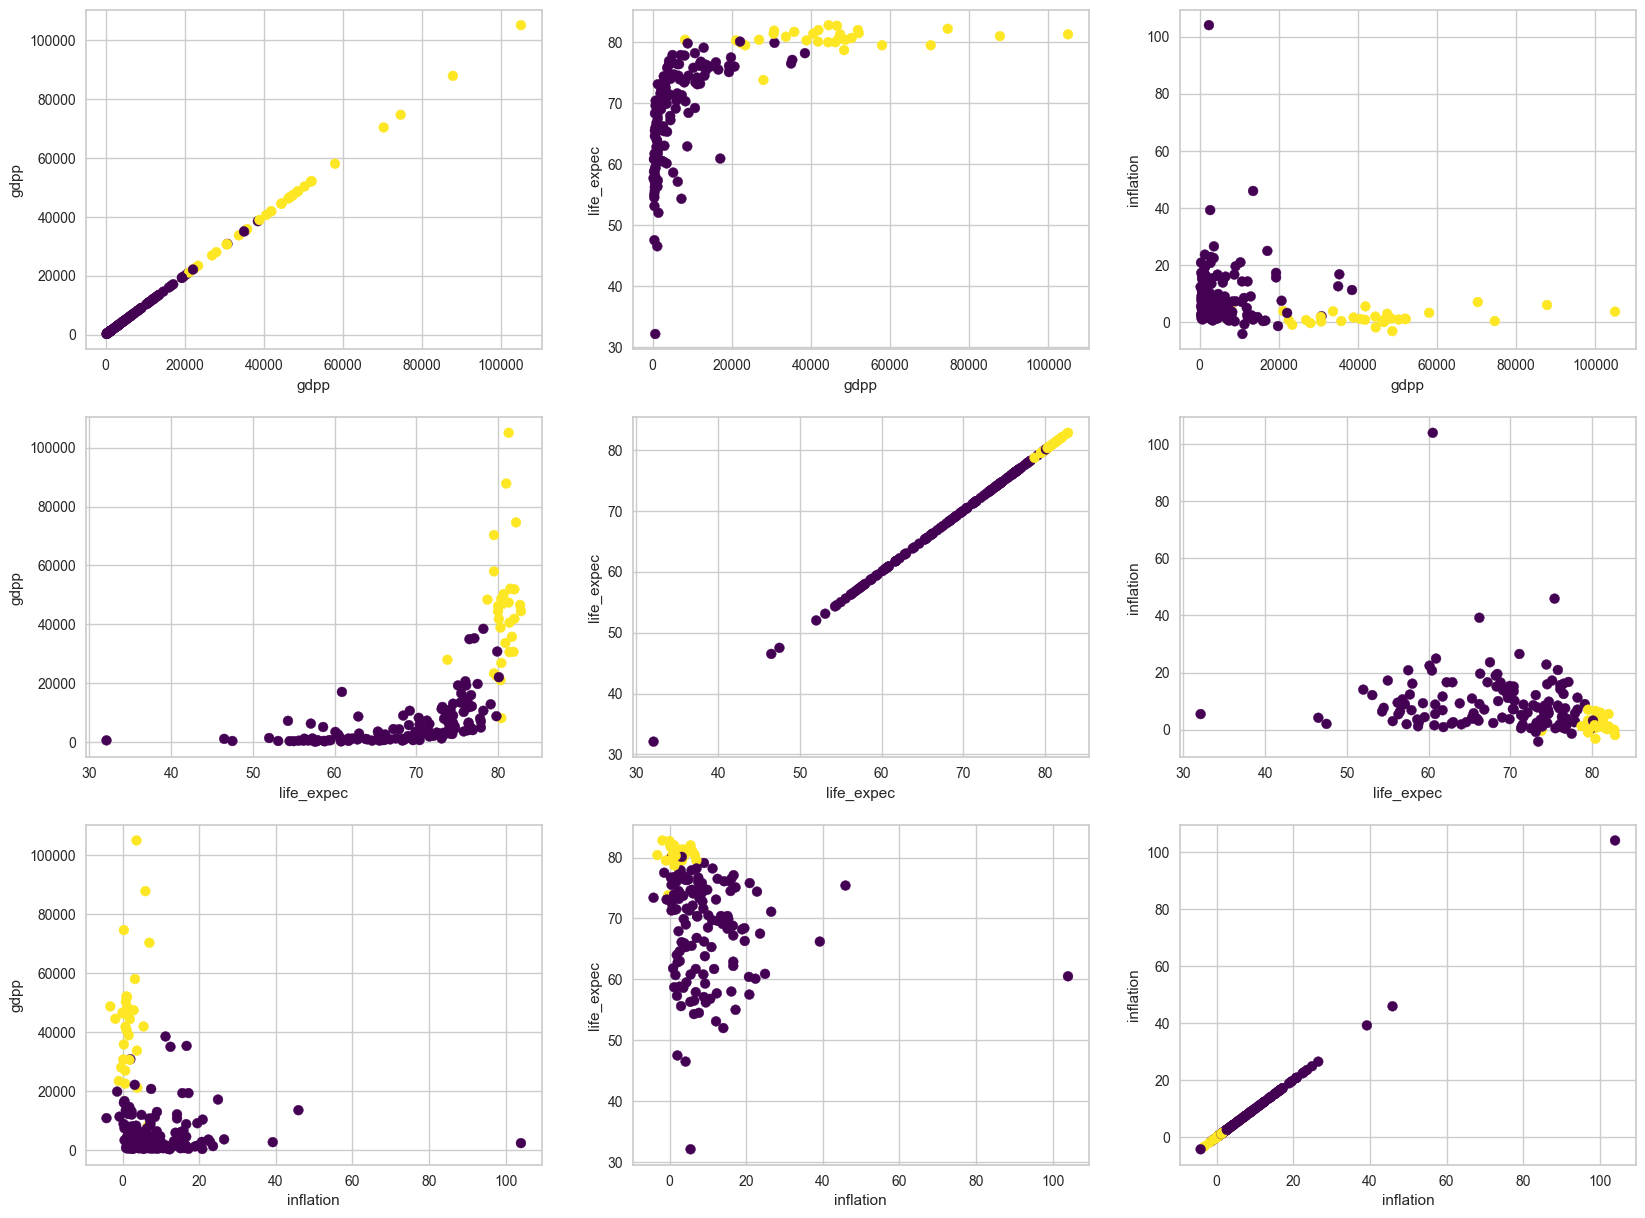

In [397]:
fig, ax = plt.subplots(3, 3, figsize=(20,15))
for i in range(len(features_to_plot)):
    for j in range(len(features_to_plot)):
        ax[i, j].scatter(df[features_to_plot[i]], df[features_to_plot[j]], c=labels, cmap='viridis', s=50)
        ax[i, j].set_xlabel(features_to_plot[i])
        ax[i, j].set_ylabel(features_to_plot[j])

plt.show()